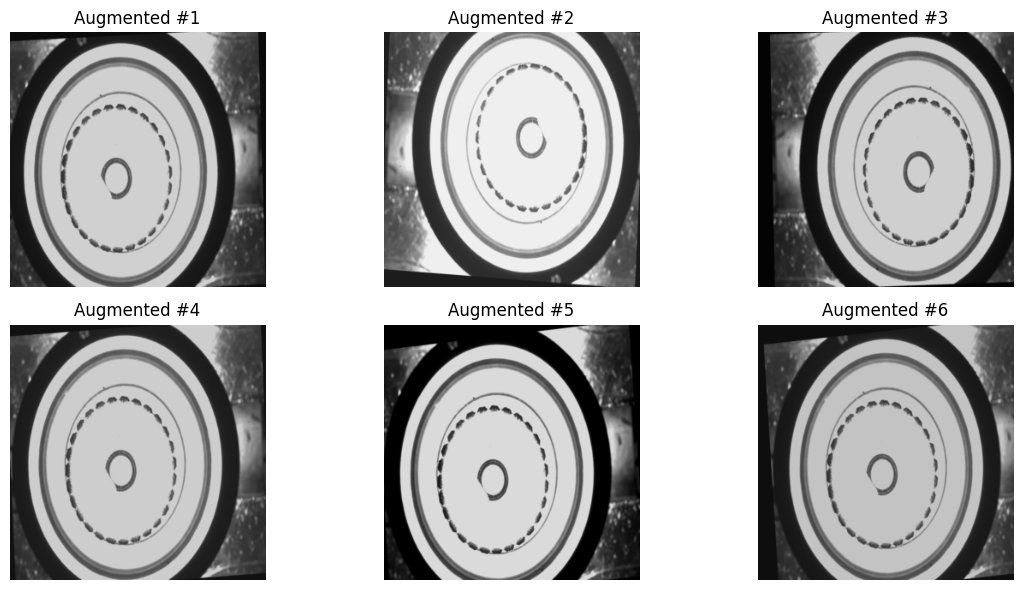

In [1]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# ==============================
# 1️⃣ 네가 쓴 transform 그대로
# ==============================
transform = transforms.Compose([
    transforms.RandomAffine(degrees=10, translate=(0.07, 0.07)),  # Shift + Rotate + Scale
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.GaussianBlur(kernel_size=(3, 3)),
    # transforms.CenterCrop((1900, 1900)),
    transforms.Resize((299, 299)),
    transforms.ToTensor(),  # Normalize 생략 (시각화용)
])

# ==============================
# 2️⃣ 테스트용 이미지 불러오기
# ==============================
img_path = "/mnt/nas/seohan_image/seohan_data/origin/27_45/20231123_083304_49748-95275.bmp"   # 👈 테스트용 이미지 경로로 변경
image = Image.open(img_path).convert("RGB")

# ==============================
# 3️⃣ 여러 번 증강해서 보기
# ==============================
plt.figure(figsize=(12, 6))
for i in range(6):  # 6개 버전 미리보기
    aug_img = transform(image)          # 증강 적용
    aug_img = aug_img.permute(1, 2, 0)  # (C,H,W) → (H,W,C) 변환
    plt.subplot(2, 3, i + 1)
    plt.imshow(aug_img)
    plt.axis("off")
    plt.title(f"Augmented #{i+1}")
plt.tight_layout()
plt.show()


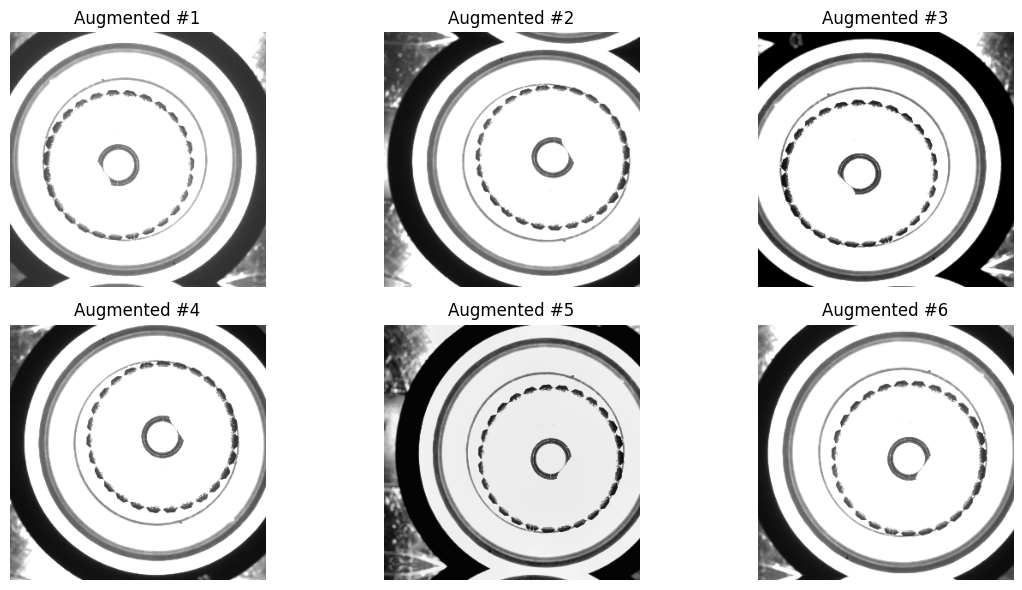

In [25]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt

# 증강 정의 (지금 쓰신 것 그대로)
transform = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.08, scale_limit=0.05, rotate_limit=10, border_mode=cv2.BORDER_REFLECT_101, p=0.8),
    A.MotionBlur(blur_limit=5, p=0.3),
    A.GaussianBlur(blur_limit=3, p=0.2),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.CLAHE(p=0.2),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.CenterCrop(height=1900, width=1900),
    A.Resize(299, 299),
])

# 테스트용 이미지 경로
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 여러 번 변형해서 보기
plt.figure(figsize=(12, 6))
for i in range(6):
    augmented = transform(image=image)['image']
    plt.subplot(2, 3, i+1)
    plt.imshow(augmented)
    plt.axis('off')
    plt.title(f'Augmented #{i+1}')
plt.tight_layout()
plt.show()


In [18]:
from pathlib import Path
pathlist = ['tset1','test2','', '??']
Path('???',*pathlist)

PosixPath('???/tset1/test2/??')

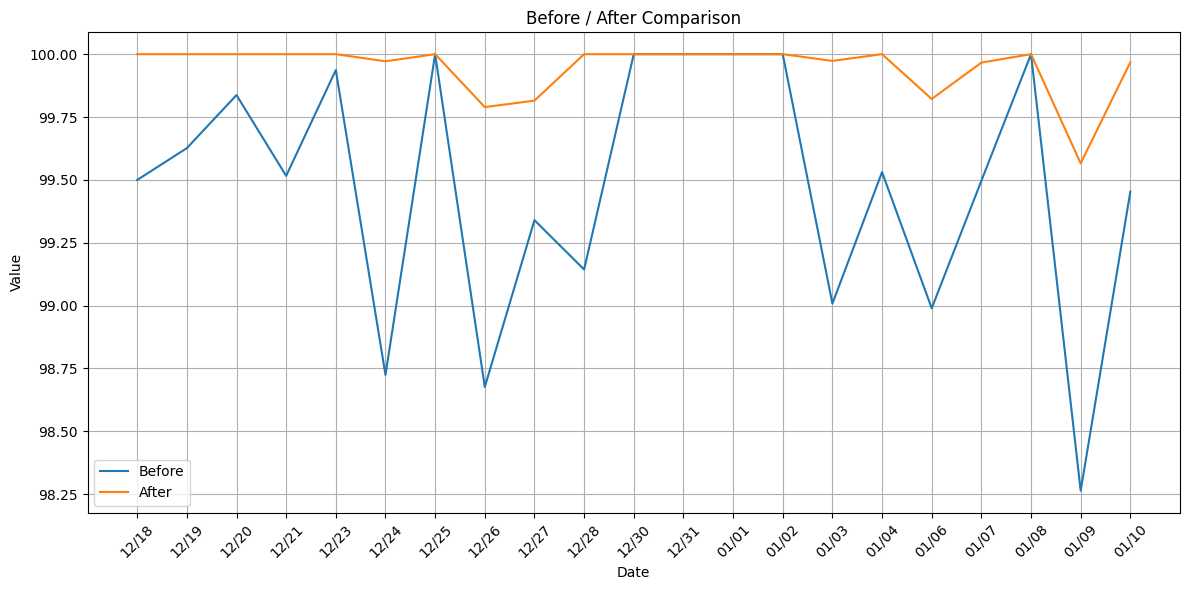

In [22]:
import matplotlib.pyplot as plt

# Data
dates = [
    "12/18","12/19","12/20","12/21","12/23","12/24","12/25","12/26","12/27","12/28",
    "12/30","12/31","01/01","01/02","01/03","01/04","01/06","01/07","01/08","01/09","01/10"
]

before = [
    99.49958299, 99.62616822, 99.83726607, 99.51590595, 99.93670886,
    98.72412815, 100, 98.67629362, 99.33984684, 99.14346895,
    100, 100, 100, 100, 99.0080429, 99.5308835, 98.98929845,
    99.49630625, 100, 98.26361484, 99.45302445
]

after = [
    100, 100, 100, 100, 100,
    99.97164729, 100, 99.78941035, 99.81515712, 100,
    100, 100, 100, 100, 99.97319035, 100, 99.8216409,
    99.96642042, 100, 99.56590371, 99.96782497
]

# Draw chart
plt.figure(figsize=(12, 6))
plt.plot(dates, before, label='Before')
plt.plot(dates, after, label='After')

plt.title("Before / After Comparison")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()
